In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip -uq "/content/drive/MyDrive/datasets/image_classes.zip" -d "/content/drive/MyDrive/datasets/image_classes"

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
from google.colab.patches import cv2_imshow

In [8]:
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.losses import binary_crossentropy
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

In [49]:
train_dataset = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_dataset = ImageDataGenerator(rescale = 1./255)

In [50]:
training_set= train_dataset.flow_from_directory(r'/content/drive/MyDrive/datasets/image_classes/train',
                                              target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set= test_dataset.flow_from_directory(r'/content/drive/MyDrive/datasets/image_classes/test',
                                              target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 601 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [51]:
vgg = VGG16(input_shape=[224,224] + [3],weights ='imagenet',include_top = False)

In [53]:
x = Flatten()(vgg.output)
prediction = Dense(3,activation = 'softmax')(x)
model_vgg = Model(inputs = vgg.input, outputs = prediction)
model_vgg.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [55]:
model_vgg.compile(optimizer = "adam",metrics = ['accuracy'],loss='categorical_crossentropy')

In [56]:
model_vgg.fit(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/40
19/19 [==============================] - 38s 2s/step - loss: 1.4513 - accuracy: 0.3128 - val_loss: 1.1240 - val_accuracy: 0.3333
Epoch 2/40
19/19 [==============================] - 16s 845ms/step - loss: 1.1385 - accuracy: 0.3317 - val_loss: 1.0628 - val_accuracy: 0.5000
Epoch 3/40
19/19 [==============================] - 16s 844ms/step - loss: 1.0859 - accuracy: 0.4164 - val_loss: 0.6163 - val_accuracy: 0.6667
Epoch 4/40
19/19 [==============================] - 16s 846ms/step - loss: 0.8091 - accuracy: 0.6263 - val_loss: 0.5675 - val_accuracy: 0.8333
Epoch 5/40
19/19 [==============================] - 16s 848ms/step - loss: 0.9484 - accuracy: 0.7029 - val_loss: 0.3754 - val_accuracy: 0.8333
Epoch 6/40
19/19 [==============================] - 16s 843ms/step - loss: 0.5413 - accuracy: 0.8332 - val_loss: 0.2816 - val_accuracy: 0.8333
Epoch 7/40
19/19 [==============================] - 16s 840ms/step - loss: 0.4484 - accuracy: 0.8016 - val_loss: 0.4702 - val_accuracy: 0.6667
Ep

In [57]:
model_vgg.save('model_vgg.h5')

In [16]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),kernel_size = (3,3),activation="relu",filters = 64))
model.add(Conv2D(activation='relu',filters = 64,kernel_size = (3,3)))
model.add(Conv2D(activation='relu',filters = 256,kernel_size = (3,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(activation='relu',filters = 512,kernel_size = (3,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(activation='relu',filters = 256,kernel_size = (3,3)))
model.add(Conv2D(activation='relu',filters = 128,kernel_size = (3,3)))
model.add(Dropout(0.3))
model.add(Conv2D(activation='relu',filters = 64,kernel_size = (3,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(activation='relu',filters = 32,kernel_size = (3,3)))
model.add(Flatten())
model.add(Dense(units = 3 , activation = 'softmax'))

In [17]:
model.compile(optimizer = "adam",metrics = ['accuracy'],loss='categorical_crossentropy')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 256)     147712    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 256)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 107, 107, 512)     1180160   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 512)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 51, 51, 256)       1

In [19]:
model.fit(training_set,validation_data=test_set,epochs = 80, steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/80
21/21 [==============================] - 80s 2s/step - loss: 1.4568 - accuracy: 0.3208 - val_loss: 1.5041 - val_accuracy: 0.5952
Epoch 2/80
21/21 [==============================] - 40s 2s/step - loss: 1.0540 - accuracy: 0.6656 - val_loss: 0.5041 - val_accuracy: 0.8036
Epoch 3/80
21/21 [==============================] - 40s 2s/step - loss: 0.3577 - accuracy: 0.8607 - val_loss: 0.6240 - val_accuracy: 0.8452
Epoch 4/80
21/21 [==============================] - 39s 2s/step - loss: 0.1155 - accuracy: 0.9721 - val_loss: 0.1377 - val_accuracy: 0.9881
Epoch 5/80
21/21 [==============================] - 39s 2s/step - loss: 0.0241 - accuracy: 0.9878 - val_loss: 0.2834 - val_accuracy: 0.8690
Epoch 6/80
21/21 [==============================] - 40s 2s/step - loss: 0.0190 - accuracy: 0.9976 - val_loss: 0.1685 - val_accuracy: 0.9643
Epoch 7/80
21/21 [==============================] - 39s 2s/step - loss: 0.0753 - accuracy: 0.9846 - val_loss: 0.2435 - val_accuracy: 0.9286
Epoch 8/80
21/21 [==

In [20]:
model.save('face_recog_1.h5')

In [58]:
face_extract = cv2.CascadeClassifier('/content/haarcasacde_facefrontal_default.xml')
def return_face(img):
    face = face_extract.detectMultiScale(img,1.3,5)
    if face is ():
        return None
    else:
        cropped_face = []
        for (x,y,w,h) in face :
            x = x - 10
            y = y - 10
            cropped_face.append(img[y:y+h+50 , x:x+w+50])
        return cropped_face
        

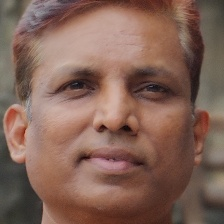

In [64]:

img = cv2.imread('/content/face manoj2.jpg')
src = cv2.resize(return_face(img)[0],(224,224))
src = np.reshape(src,(1,224,224,3))
cv2_imshow(img)

In [65]:
model_vgg.predict(src)

array([[0., 1., 0.]], dtype=float32)

In [71]:
vid = cv2.VideoCapture(0)
labels_dict={0:'Aryan',1:'Manoj',2:'Shilpa'}
color_dict={0:(0,255,0),1:(0,0,255),2:{0,0,255}}
while(True):
  success , img = vid.read()
  face_extract = cv2.CascadeClassifier('/content/haarcasacde_facefrontal_default.xml')
  faces = face_extract.detectMultiScale(img,1.3,5)
  for (x,y,w,h) in faces:
    face = img[y:y+h,x:x+w]
    resize = cv2.resize(face,(224,224))
    resize = resize/255
    cropp = np.reshape(resize,(1,224,224,3))
    result = model_vgg.predict(cropp)

    label=np.argmax(result,axis=1)[0]
      
    cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
    cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
    cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
  cv2_imshow(img)
  if cv2.waitKey(1) & 0xFF == ord('q'):
      break
source.release()
cv2.destroyAllWindows()

AttributeError: ignored